## Predicción del precio del airbnb

Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos
disponibles.
1. Preparación de datos: División train/test
2. Análisis exploratorio, por ejemplo:
a. Head, describe, dtypes, etc.
b. Outliers
c. Correlación
3. Preprocesamiento:
a. Eliminación de variables, mediante selección (random forest/Lasso), alta
correlación, alto porcentaje de missings, o el método que se considere
oportuno.
b. Generación de variables
4. Modelado:a. Cross validation
b. Evaluación; mejor si lo hacéis de más de un modelo, porque así podéis
comparar entre ellos.
5. Conclusión: escrita, no numérica; un par de líneas es más que suficiente.


In [168]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [169]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

# Cargamos los datos

In [170]:
data = pd.read_csv('./airbnb-listings-extract.csv',sep=';', decimal='.')
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [171]:
data.columns


Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [172]:
#Ahora nos quedamos sólo con los datos para Madrid

data_inicial = data[data['City'].str.contains('Madri', case=False, na=False)]


Voy a eliminar todas las columnas que no se van a usar, por ejemplo al haber filtrado ya por Madrid, eliminaré City 
y demás columnas que hacen referencia a la localización, a excepción de las de barrio
por otro lado tampoco son necesarios los ID que identifican la vivienda ni al propietario, como tampoco la información referente 
a localidad de propietario.Las fechas tampoco las necesitamos para realizar la predicción y los campos de comentarios tampoco

In [173]:
columnas_a_conservar = ['Neighbourhood', 'Security Deposit', 'Availability 30', 'Availability 60','Availability 90', 'Availability 365', 'Review Scores Rating','Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 
'Property Type','Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type','Price', 'Cleaning Fee', 'Guests Included', 'Extra People','Cancellation Policy', 'Square Feet', 'Minimum Nights', 'Maximum Nights']

data_inicial = data_inicial[columnas_a_conservar]

In [174]:
# Revisamos que ha borrado el resto
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

# Análisis Exploratorio con los datos de Train

Primero dividimos train y test

In [175]:
#Ahora ya podemos hacer la division entre train y test
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_inicial, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./data_train.csv', sep=';', index=False, decimal='.')
test.to_csv('./data_test.csv', sep=';', index=False, decimal='.')

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

data_train = pd.read_csv('data_train.csv', sep=';', decimal='.')


Dimensiones del dataset de training: (10596, 24)
Dimensiones del dataset de test: (2650, 24)


In [176]:
data_train.head() #al hacer head puedo ver los datos en data Wragler

,Neighbourhood,Security Deposit,Availability 30,Availability 60,Availability 90,Availability 365,Review Scores Rating,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Property Type,...,Beds,Bed Type,Price,Cleaning Fee,Guests Included,Extra People,Cancellation Policy,Square Feet,Minimum Nights,Maximum Nights
0,Embajadores,200.0,4,20,38,299,97.0,Embajadores,Centro,Apartment,...,3.0,Real Bed,200.0,70.0,5,15,strict,NaN,2,1125
1,La Latina,150.0,3,15,36,37,98.0,Palacio,Centro,Apartment,...,5.0,Real Bed,115.0,50.0,3,15,strict,NaN,1,1125
2,Justicia,NaN,0,0,0,0,100.0,Justicia,Centro,Apartment,...,1.0,Real Bed,120.0,NaN,1,0,flexible,NaN,1,1125
3,Hortaleza,NaN,2,32,62,337,97.0,Canillas,Hortaleza,Apartment,...,3.0,Real Bed,24.0,NaN,1,25,flexible,NaN,1,1125
4,Legazpi,90.0,4,4,8,206,94.0,Legazpi,Arganzuela,Loft,...,1.0,Real Bed,32.0,NaN,1,0,flexible,0.0,3,1125


In [177]:
data_train.shape

(10596, 24)

In [178]:
data_train.describe()

,Security Deposit,Availability 30,Availability 60,Availability 90,Availability 365,Review Scores Rating,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Square Feet,Minimum Nights,Maximum Nights
count,4521.000000,10596.000000,10596.000000,10596.000000,10596.000000,8306.000000,10596.000000,10555.000000,10578.000000,10554.000000,10591.000000,6291.000000,10596.000000,10596.000000,410.000000,10596.000000,10596.000000
mean,183.399690,8.709891,22.844941,40.009815,205.615232,91.713821,3.196300,1.251824,1.297504,1.990525,66.017373,29.464155,1.580974,7.471027,349.339024,2.875991,988.135051
std,107.390317,9.047138,19.453822,29.284059,126.960819,8.889981,2.003105,0.597842,0.823726,1.522971,55.969122,25.331182,1.093355,10.887134,513.821799,7.482022,9957.125811
min,70.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.000000,1.000000,9.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,100.000000,0.000000,5.000000,13.000000,83.000000,89.000000,2.000000,1.000000,1.000000,1.000000,31.000000,15.000000,1.000000,0.000000,0.000000,1.000000,365.000000
50%,150.000000,6.000000,20.000000,38.000000,247.500000,94.000000,2.000000,1.000000,1.000000,1.000000,52.000000,25.000000,1.000000,5.000000,88.000000,2.000000,1125.000000
75%,200.000000,13.000000,38.000000,65.000000,320.000000,98.000000,4.000000,1.000000,2.000000,2.000000,80.000000,35.000000,2.000000,15.000000,600.250000,3.000000,1125.000000
max,990.000000,30.000000,60.000000,90.000000,365.000000,100.000000,16.000000,8.000000,10.000000,16.000000,875.000000,500.000000,15.000000,276.000000,5167.000000,365.000000,1000000.000000


In [179]:
data_train.dtypes


Neighbourhood                    object
Security Deposit                float64
Availability 30                   int64
Availability 60                   int64
Availability 90                   int64
Availability 365                  int64
Review Scores Rating            float64
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Price                           float64
Cleaning Fee                    float64
Guests Included                   int64
Extra People                      int64
Cancellation Policy              object
Square Feet                     float64
Minimum Nights                    int64
Maximum Nights                    int64
dtype: object

Ahora vamos a calcular el porcentaje de NA que hay en las columnas restantes para eliminar las que tengan NA en el 50% o más del dataset

In [180]:
na_percentages = (data_train.isnull().sum() / len(data_train)) * 100

na_info = pd.DataFrame({'Columna': data_train.columns, 'Porcentaje_NA': na_percentages})
print(na_info.sort_values(by='Porcentaje_NA', ascending=False))

                                                   Columna  Porcentaje_NA
Square Feet                                    Square Feet      96.130615
Security Deposit                          Security Deposit      57.332956
Cleaning Fee                                  Cleaning Fee      40.628539
Neighbourhood                                Neighbourhood      34.258211
Review Scores Rating                  Review Scores Rating      21.611929
Beds                                                  Beds       0.396376
Bathrooms                                        Bathrooms       0.386938
Bedrooms                                          Bedrooms       0.169875
Price                                                Price       0.047188
Neighbourhood Cleansed              Neighbourhood Cleansed       0.000000
Minimum Nights                              Minimum Nights       0.000000
Availability 30                            Availability 30       0.000000
Cancellation Policy                   

In [181]:
# Borramos las columnas que tienen 50% de NaN
columns_to_drop = na_percentages[na_percentages >= 50].index
data_train = data_train.drop(columns=columns_to_drop)

In [182]:
print("Columnas eliminadas:", columns_to_drop)
print("Nuevo conjunto de datos sin las columnas eliminadas:")
data_train.shape

Columnas eliminadas: Index(['Security Deposit', 'Square Feet'], dtype='object')
Nuevo conjunto de datos sin las columnas eliminadas:


(10596, 22)

Viendo el resultado del calculo del porcentaje de NA voy a eliminar también 'Neighbourhood' ya que tiene un 34% de NA y dispongo de Neighbourhood Cleansed y Neighbourhood Group Cleansed

In [183]:
data_train = data_train.drop(['Neighbourhood'],axis=1)

In [184]:
data_train.head()

,Availability 30,Availability 60,Availability 90,Availability 365,Review Scores Rating,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Property Type,Room Type,Accommodates,...,Bedrooms,Beds,Bed Type,Price,Cleaning Fee,Guests Included,Extra People,Cancellation Policy,Minimum Nights,Maximum Nights
0,4,20,38,299,97.0,Embajadores,Centro,Apartment,Entire home/apt,7,...,3.0,3.0,Real Bed,200.0,70.0,5,15,strict,2,1125
1,3,15,36,37,98.0,Palacio,Centro,Apartment,Entire home/apt,6,...,3.0,5.0,Real Bed,115.0,50.0,3,15,strict,1,1125
2,0,0,0,0,100.0,Justicia,Centro,Apartment,Entire home/apt,2,...,1.0,1.0,Real Bed,120.0,NaN,1,0,flexible,1,1125
3,2,32,62,337,97.0,Canillas,Hortaleza,Apartment,Private room,3,...,1.0,3.0,Real Bed,24.0,NaN,1,25,flexible,1,1125
4,4,4,8,206,94.0,Legazpi,Arganzuela,Loft,Entire home/apt,2,...,1.0,1.0,Real Bed,32.0,NaN,1,0,flexible,3,1125


Revisando los datos de las variables con data Wrangler y con describe() saco varias conclusiones:
1. En cuanto a la variable categórica del barrio, en Neighbourhood Cleansed tengo 125 barrios en train en Neighbourhood Group Cleansed tengo 21 en este segundo caso concentra el 51% de los casos en Centro, al tratarse de una variable con muchas clases, no voy a usar labelEncoder, sino que imputaré con meanEncoder, por tanto me quedaré con Neighbourhood Cleansed
2. En Price veo que hay 5 NA que filtraré ya que como hemos visto en la tabla na_info  donde hemos dejado los porcentajes de NA es menos del 1%
3. En Cleaning Fee imputaremos un 0 ya que es un importe que el propietario puede poner por servicio de limpieza si no lo ha indicado el importe es 0
4. Revisando 'Minimum Nights' y 'Maximum Nights' veo que hay 110 casos con minimo de días superior a 20 y 18 con maximo superior a 2400 y la diferencia

In [185]:
# filtro los price nulos
data_train = data_train[data_train['Price'].notnull()]



In [186]:
data_train.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Availability 30,10591.0,NaN,NaN,NaN,8.708526,9.043788,0.0,0.0,6.0,13.0,30.0
Availability 60,10591.0,NaN,NaN,NaN,22.844585,19.448268,0.0,5.0,20.0,38.0,60.0
Availability 90,10591.0,NaN,NaN,NaN,40.011897,29.275489,0.0,13.0,38.0,65.0,90.0
Availability 365,10591.0,NaN,NaN,NaN,205.62572,126.940584,0.0,83.0,248.0,320.0,365.0
Review Scores Rating,8305.0,NaN,NaN,NaN,91.712824,8.890051,20.0,89.0,94.0,98.0,100.0
Neighbourhood Cleansed,10591,125,Embajadores,1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighbourhood Group Cleansed,10591,21,Centro,5409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Type,10591,21,Apartment,8736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Room Type,10591,3,Entire home/apt,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accommodates,10591.0,NaN,NaN,NaN,3.195732,2.003002,1.0,2.0,2.0,4.0,16.0


In [187]:
data_train.head()


,Availability 30,Availability 60,Availability 90,Availability 365,Review Scores Rating,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Property Type,Room Type,Accommodates,...,Bedrooms,Beds,Bed Type,Price,Cleaning Fee,Guests Included,Extra People,Cancellation Policy,Minimum Nights,Maximum Nights
0,4,20,38,299,97.0,Embajadores,Centro,Apartment,Entire home/apt,7,...,3.0,3.0,Real Bed,200.0,70.0,5,15,strict,2,1125
1,3,15,36,37,98.0,Palacio,Centro,Apartment,Entire home/apt,6,...,3.0,5.0,Real Bed,115.0,50.0,3,15,strict,1,1125
2,0,0,0,0,100.0,Justicia,Centro,Apartment,Entire home/apt,2,...,1.0,1.0,Real Bed,120.0,NaN,1,0,flexible,1,1125
3,2,32,62,337,97.0,Canillas,Hortaleza,Apartment,Private room,3,...,1.0,3.0,Real Bed,24.0,NaN,1,25,flexible,1,1125
4,4,4,8,206,94.0,Legazpi,Arganzuela,Loft,Entire home/apt,2,...,1.0,1.0,Real Bed,32.0,NaN,1,0,flexible,3,1125


## Pintamos histogramas de las variables 

Vemos en los histogramas y en los resultados del describe() que hay unos pocos valores de mas de 800€, o un Cleaning fee de 500 cuando si miramos los cuartiles del desribe() el 75% está en 35
Lo vemos también en otras variables como Accommodates, bathrooms 
Si filtro los datos en Data Wragler veo que hay algun caso de Casa completa con cabida para muchas personas por tanto, más importe de precio, cleaning fee
Podríamos considerarlo como un outlier pero finalmente decido no quitarlos porque es una posibilidad la de que se publiquen casas grandes en un airbnb

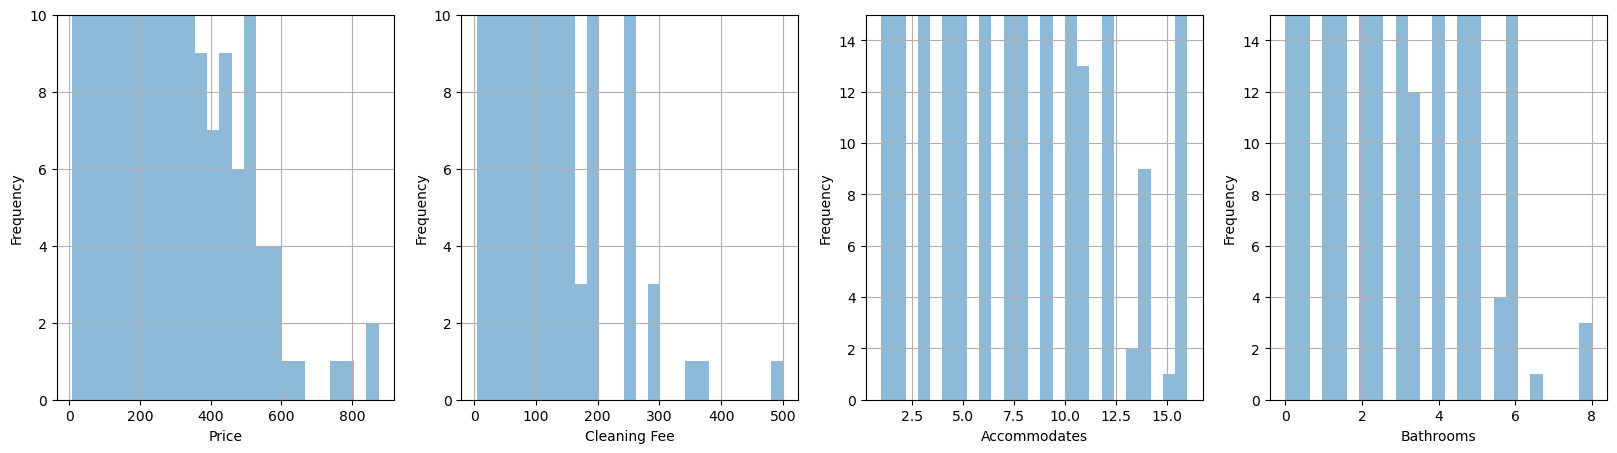

In [188]:
plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
data_train['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 10)
#plt.yscale("log")
plt.xlabel('Price')

plt.subplot(1,4,2)
data_train['Cleaning Fee'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 10)
#plt.yscale("log")
plt.xlabel('Cleaning Fee')

plt.subplot(1,4,3)
data_train['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Accommodates')

plt.subplot(1,4,4)
data_train['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Bathrooms')

plt.show()

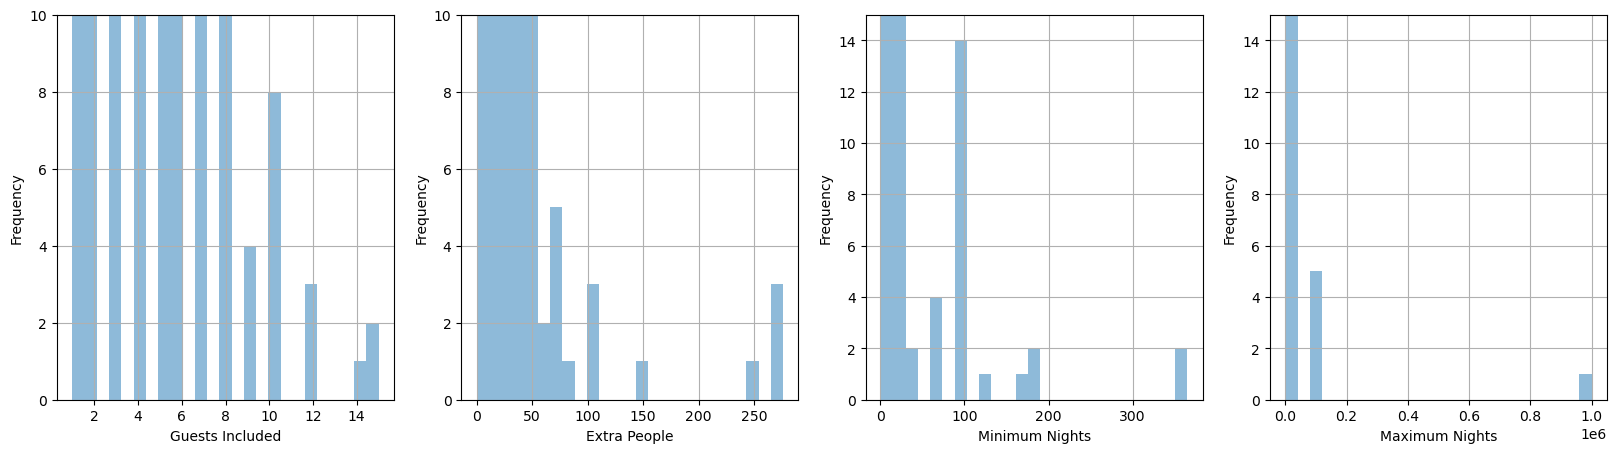

In [189]:
plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
data_train['Guests Included'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 10)
#plt.yscale("log")
plt.xlabel('Guests Included')

plt.subplot(1,4,2)
data_train['Extra People'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 10)
#plt.yscale("log")
plt.xlabel('Extra People')

plt.subplot(1,4,3)
data_train['Minimum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Minimum Nights')

plt.subplot(1,4,4)
data_train['Maximum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Maximum Nights')

plt.show()

## Análisis de correlación



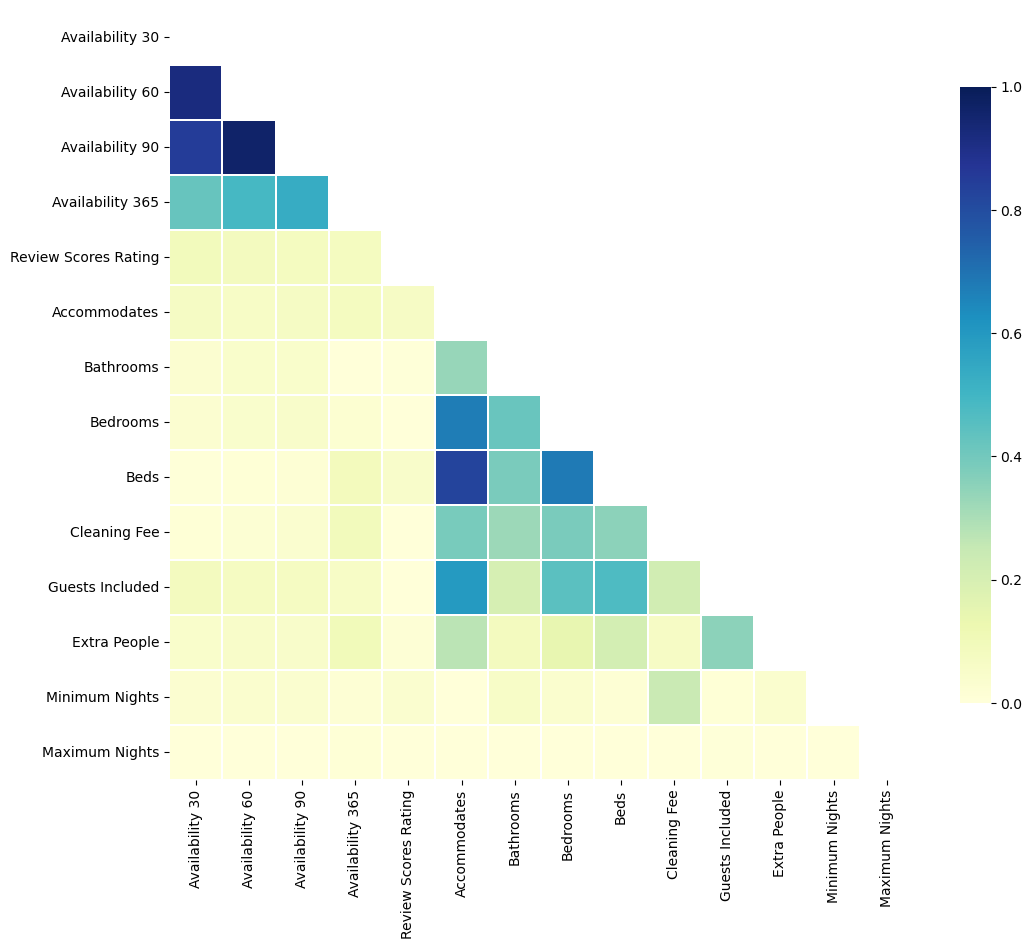

In [190]:
import seaborn as sns


corr = np.abs(data_train.drop(['Price'], axis=1).corr())


mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(12, 10))


sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()



Viendo esta matriz de correlacion vemos que 'Availability 60' y 'Availability 90' están muy correlacionadas con lo cual podemos quitar una de ellas, entre las que quedan vemos que 'Availability 60' y 'Availability 30' estan tambien bastante correlacionadas asi que reviso la correlación entre availability  de momento me quedaré con 'Availability 30' y 'Availability 365'

Accomodates y beds también están bastente correlacionadas y teniendo en cuenta que en Acoomodates no hay NA y en cambio en Beds tenemos un 40% de NA me quedaré con Accomodates y eliminaré Beds

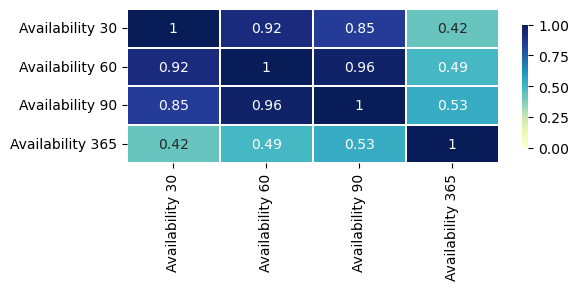

In [191]:
# Reviso la correlación entre Availabilities para ver con cual me quedao a parte de la 365
import seaborn as sns


selected_columns = ['Availability 30', 'Availability 60', 'Availability 90', 'Availability 365']
corr = data_train[selected_columns].corr()


f, ax = plt.subplots(figsize=(6, 2))

sns.heatmap(corr, annot=True,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [192]:
# Borro las que de este primer análisis de las variables con Wragler y viendo caorrelación decido eliminar
data_train = data_train.drop(['Availability 60','Availability 90','Beds','Neighbourhood Group Cleansed'],axis=1)

## IMPUTACIÓN

# Reviso algunas variables a las que he de imputar respecto a Price

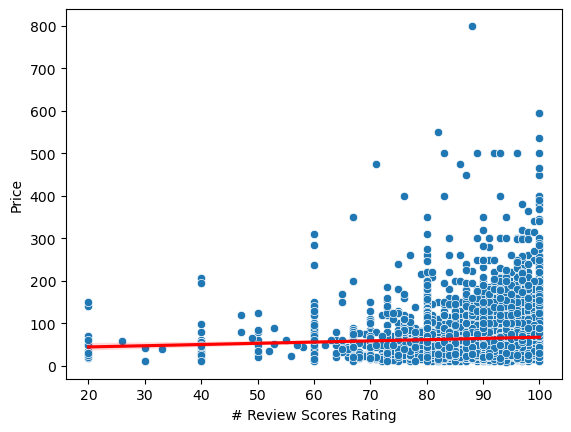

In [193]:
#Review Score
sns.scatterplot(data=data_train, x='Review Scores Rating', y='Price')

# Ajustar una línea de regresión
sns.regplot(data=data_train, x='Review Scores Rating', y='Price', scatter=False, color='red')

# Etiquetas y mostrar el gráfico
plt.xlabel('# Review Scores Rating')
plt.ylabel('Price')
plt.show()

Pruebo a imputar la media a esta variable pero cambiaba la moda del dataset como se muestra en la imagen, así que finalmente imputo la moda

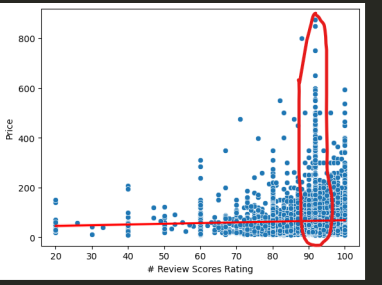

In [194]:
# Imputo la moda aunque después de ejecutar varias veces los modelos es una variable que finalmente no usaré
moda_review_scores = data_train['Review Scores Rating'].mode()[0]
data_train['Review Scores Rating'].fillna(moda_review_scores, inplace=True)

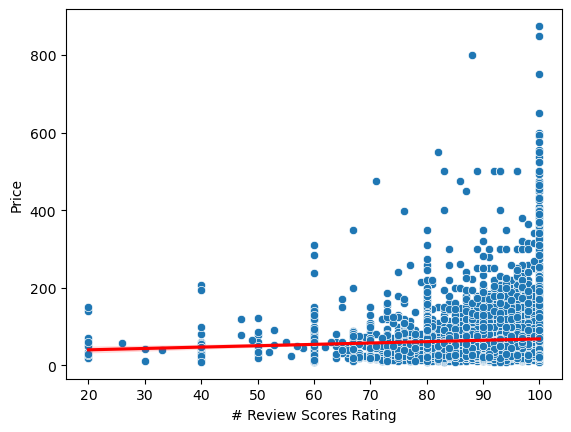

In [195]:
# como queda la variable respecto a precio con la imputación
sns.scatterplot(data=data_train, x='Review Scores Rating', y='Price')

# Ajustar una línea de regresión
sns.regplot(data=data_train, x='Review Scores Rating', y='Price', scatter=False, color='red')

# Etiquetas y mostrar el gráfico
plt.xlabel('# Review Scores Rating')
plt.ylabel('Price')
plt.show()

In [196]:
# Cleaning Fee imputamos un 0 si no hay gastos de limpieza no tiene sentido imputar la media
data_train['Cleaning Fee'].fillna(0, inplace=True)

In [197]:
#Reviso con Data Wrangler y con los histogramas y veo que las variables 'Minimum Nights' y 'Maximum Nights' tienen algunos registros muy lejanos al rango en el que está 
#concentrada la mayor parte del dataset, por ejemplo 1.000.000 de noches

minimo_mas_20= (data_train['Minimum Nights'] > 20).sum()
maximo_mas_50k =(data_train['Maximum Nights'] > 2400).sum() 
print(f"hay {minimo_mas_20}  con minimo de noches mayor a 20")
print(f"hay {maximo_mas_50k} con maximo de noches mayor a 2400")

hay 110  con minimo de noches mayor a 20
hay 18 con maximo de noches mayor a 2400


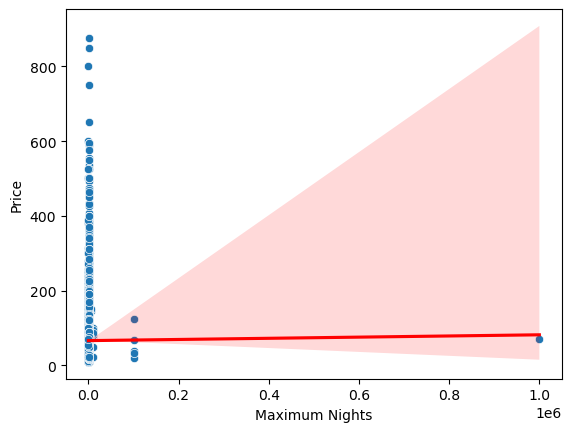

In [198]:
# Podemos ver esto en las graficas
sns.scatterplot(data=data_train, x='Maximum Nights', y='Price')

# Ajustar una línea de regresión
sns.regplot(data=data_train, x='Maximum Nights', y='Price', scatter=False, color='red')

# Etiquetas y mostrar el gráfico
plt.xlabel('Maximum Nights')
plt.ylabel('Price')
plt.show()

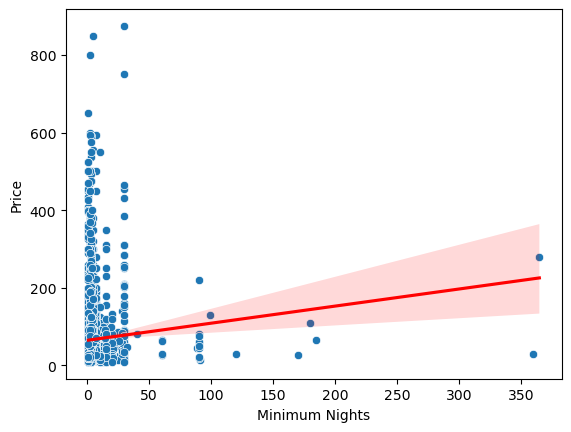

In [199]:
sns.scatterplot(data=data_train, x='Minimum Nights', y='Price')

# Ajustar una línea de regresión
sns.regplot(data=data_train, x='Minimum Nights', y='Price', scatter=False, color='red')

# Etiquetas y mostrar el gráfico
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

En los casos de 'Maximum Nights' y 'Minimum Nights' me planteo sustituir los valores fuera de rango con la media de la manera que describo en el código de abajo pero finalmente no
lo hago ya que en las pruebas, que las he realizado sustituyendo y sin sustituir, al llegar al final de la selección de caractaerísticas acabo siempre eliminando estas variables, 
así que no realizo ninguna acción con ellas

condicion = data_train['Minimum Nights'] > 20
media_minimum  = data_train['Minimum Nights'].mean()
data_train.loc[condicion, 'Minimum Nights'] = media_minimum

condicion = data_train['Maximum Nights'] > 2400
media_minimum  = data_train['Maximum Nights'].mean()
data_train.loc[condicion, 'Maximum Nights'] = media_minimum

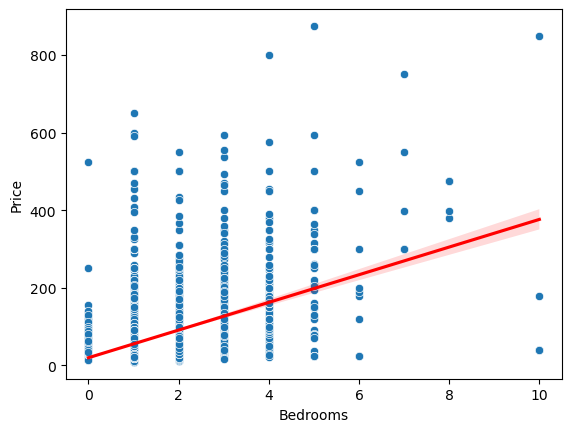

In [200]:
# Bedrooms

sns.scatterplot(data=data_train, x='Bedrooms', y='Price')

# Ajustar una línea de regresión
sns.regplot(data=data_train, x='Bedrooms', y='Price', scatter=False, color='red')

# Etiquetas y mostrar el gráfico
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [201]:
#Imputo la media
mean_Bedrooms = data_train['Bedrooms'].mean()
data_train['Bedrooms'].fillna(mean_Bedrooms , inplace=True)

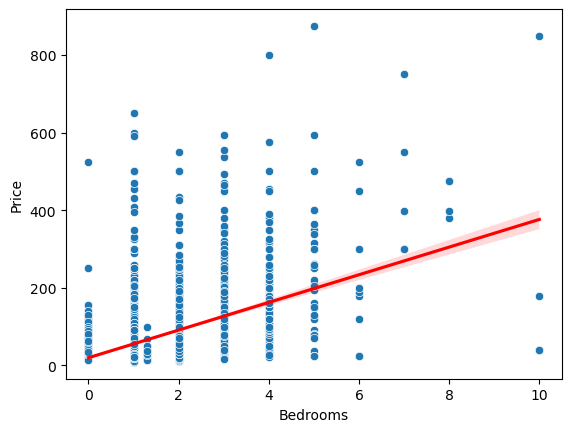

In [202]:
sns.scatterplot(data=data_train, x='Bedrooms', y='Price')

# Ajustar una línea de regresión
sns.regplot(data=data_train, x='Bedrooms', y='Price', scatter=False, color='red')

# Etiquetas y mostrar el gráfico
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

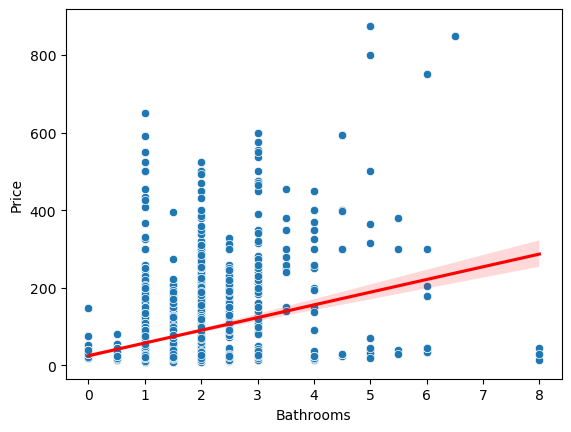

In [203]:
# Bathrooms
sns.scatterplot(data=data_train, x='Bathrooms', y='Price')

# Ajustar una línea de regresión
sns.regplot(data=data_train, x='Bathrooms', y='Price', scatter=False, color='red')

# Etiquetas y mostrar el gráfico
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [204]:
#Imputo la media
mean_Bathrooms = data_train['Bathrooms'].mean()
data_train['Bathrooms'].fillna(mean_Bathrooms , inplace=True)

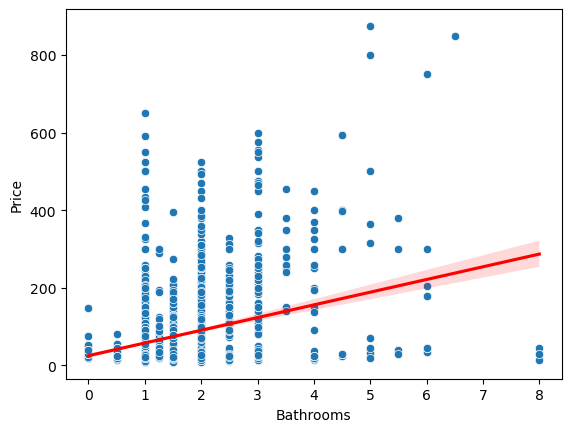

In [205]:
sns.scatterplot(data=data_train, x='Bathrooms', y='Price')

# Ajustar una línea de regresión
sns.regplot(data=data_train, x='Bathrooms', y='Price', scatter=False, color='red')

# Etiquetas y mostrar el gráfico
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [206]:
data_train.describe().T


,count,mean,std,min,25%,50%,75%,max
Availability 30,10591.0,8.708526,9.043788,0.0,0.0,6.0,13.0,30.0
Availability 365,10591.0,205.625720,126.940584,0.0,83.0,248.0,320.0,365.0
Review Scores Rating,10591.0,93.501558,8.578911,20.0,90.0,96.0,100.0,100.0
Accommodates,10591.0,3.195732,2.003002,1.0,2.0,2.0,4.0,16.0
Bathrooms,10591.0,1.251540,0.596489,0.0,1.0,1.0,1.0,8.0
Bedrooms,10591.0,1.297267,0.822987,0.0,1.0,1.0,2.0,10.0
Price,10591.0,66.017373,55.969122,9.0,31.0,52.0,80.0,875.0
Cleaning Fee,10591.0,17.485979,24.286844,0.0,0.0,10.0,30.0,500.0
Guests Included,10591.0,1.581248,1.093540,1.0,1.0,1.0,2.0,15.0
Extra People,10591.0,7.450477,10.630829,0.0,0.0,5.0,15.0,276.0


# Codificación de variables categóricas

Tenemos variables como Property Type,Room Type,Bed Type y Cancellation Policy a las que podemos aplciar un labelEncoder 
pero a Neighbourhood Cleansed le voy a aplicar un meanEncoder de manera que aplicaremos la media de precio


In [207]:
#Vamos a usar un meanEncoder ya que las variables categórias no son binomiales, por si me entra algun registro en alguna clase que no tengo en mi dataset de entrenamiento, 
#aplicaría la media global:


categorical = ['Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']

mean_map = {}

for c in categorical:
    mean = data_train.groupby(c)['Price'].mean()
    data_train[c] = data_train[c].map(mean)
    
    # Asignar la media global a las categorías desconocidas
    data_train[c].fillna(data_train['Price'].mean(), inplace=True)
    
    mean_map[c] = mean

data_train.head()

,Availability 30,Availability 365,Review Scores Rating,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Price,Cleaning Fee,Guests Included,Extra People,Cancellation Policy,Minimum Nights,Maximum Nights
0,4,299,97.0,60.174744,67.850733,87.478982,7,2.0,3.0,66.267091,200.0,70.0,5,15,75.934496,2,1125
1,3,37,98.0,77.214286,67.850733,87.478982,6,2.5,3.0,66.267091,115.0,50.0,3,15,75.934496,1,1125
2,0,0,100.0,80.037677,67.850733,87.478982,2,1.5,1.0,66.267091,120.0,0.0,1,0,57.538146,1,1125
3,2,337,97.0,57.878788,67.850733,34.318968,3,2.0,1.0,66.267091,24.0,0.0,1,25,57.538146,1,1125
4,4,206,94.0,51.000000,71.374449,87.478982,2,1.0,1.0,66.267091,32.0,0.0,1,0,57.538146,3,1125


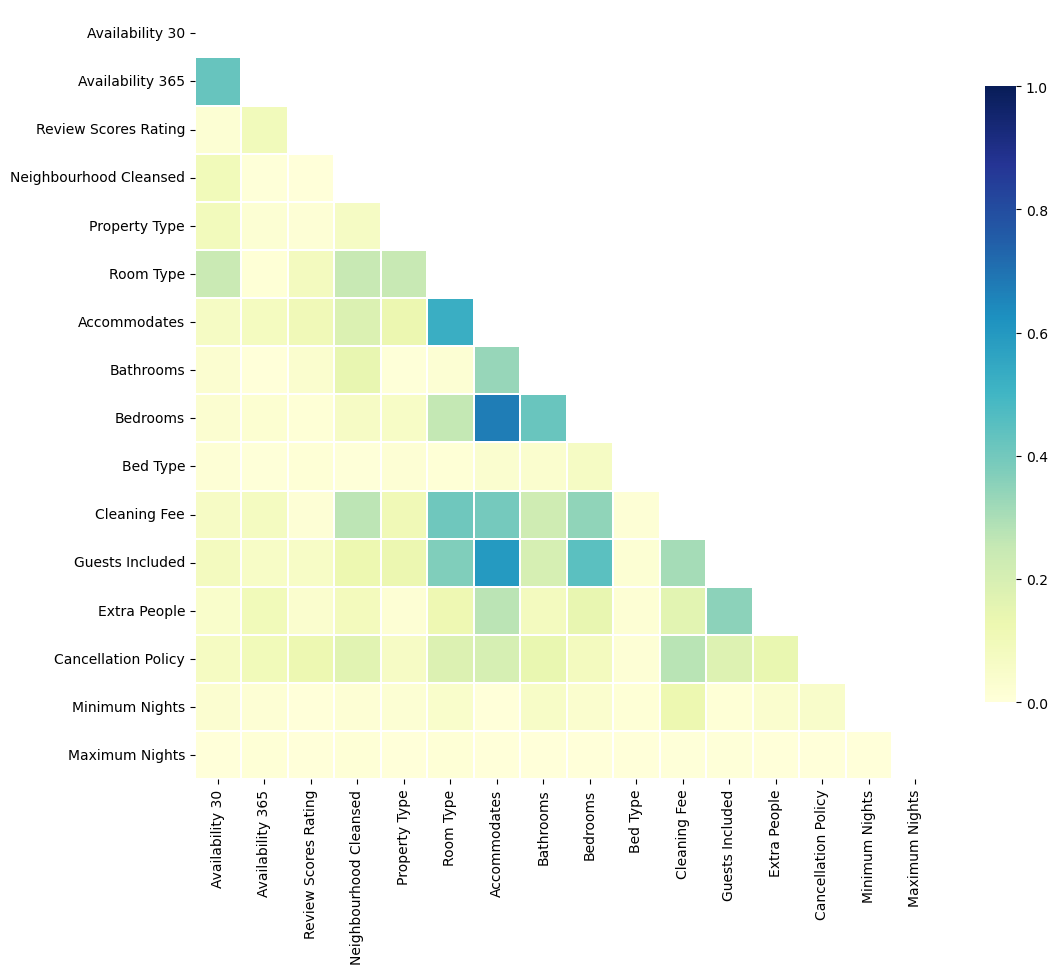

In [208]:
#Vuelvo a ver la correlacion, ya que ahora tenemos tambien las variables categóricas codificadas
import seaborn as sns


corr = np.abs(data_train.drop(['Price'], axis=1).corr())


mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(12, 10))


sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

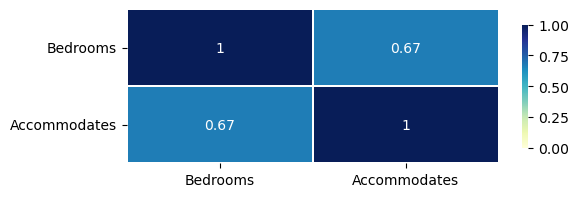

In [209]:
# Veo alta correlación entre 'Bedrooms'y 'Accommodates' veo en detalle pero no es tan alta como para excluir una de ellas
import seaborn as sns


selected_columns = ['Bedrooms', 'Accommodates']
corr = data_train[selected_columns].corr()


f, ax = plt.subplots(figsize=(6, 2))

sns.heatmap(corr, annot=True,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

## PIPELINE

# Cargamos datos, separamos y cargamos Train

In [210]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_inicial, test_size=0.2, shuffle=True, random_state=0)


# Guardamos
train.to_csv('./data_train.csv', sep=';', index=False, decimal='.')
test.to_csv('./data_test.csv', sep=';', index=False, decimal='.')

# cargamos el dataset de train 

data_train = pd.read_csv('data_train.csv', sep=';', decimal='.')

#Calculamos las variables con un 50% o mas de NaN y las eliminamos

na_percentages = (data_train.isnull().sum() / len(data_train)) * 100

na_info = pd.DataFrame({'Columna': data_train.columns, 'Porcentaje_NA': na_percentages})


columns_to_drop = na_percentages[na_percentages >= 50].index
data_train = data_train.drop(columns=columns_to_drop)

#borramos las columnas que hemos seleccionado durante el análisis
#data_train = data_train.drop(['Neighbourhood','Availability 60','Availability 90','Beds','Neighbourhood Group Cleansed'],axis=1)
data_train = data_train.drop(['Neighbourhood','Availability 60','Availability 90','Beds','Neighbourhood Group Cleansed','Availability 365',
'Review Scores Rating','Property Type','Bed Type','Cancellation Policy','Minimum Nights','Maximum Nights','Guests Included'],axis=1)


#filtramos los NaN en el precio 
data_train = data_train[data_train['Price'].notnull()]

#imputamos 0 a cleaning fee
data_train['Cleaning Fee'].fillna(0, inplace=True)


#imputamos la media a bedrooms y bathrooms
mean_Bedrooms = data_train['Bedrooms'].mean()
data_train['Bedrooms'].fillna(mean_Bedrooms , inplace=True)

mean_Bathrooms = data_train['Bathrooms'].mean()
data_train['Bathrooms'].fillna(mean_Bathrooms , inplace=True)

#codificación variables categóricas con meanEncoder
categorical = ['Neighbourhood Cleansed','Room Type']
#categorical = ['Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']

mean_map = {}
for c in categorical:
    mean = data_train.groupby(c)['Price'].mean()
    data_train[c] = data_train[c].map(mean)

    mean_map[c] = mean



#separamos x e y, y escalamos

from sklearn import preprocessing

y_train = data_train['Price']  # Columna 'Price' como variable objetivo
X_train = data_train.drop('Price', axis=1)  # Todas las demás columnas como características

# Escalar las características utilizando StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

# Verificar las dimensiones y primeras filas del conjunto de características escaladas
print(f'Dimensiones del conjunto de características escaladas: {X_train_scaled.shape}')
print(X_train_scaled.head().T)

Dimensiones del conjunto de características escaladas: (10591, 8)
                               0         1         2         3         4
Availability 30        -0.520661 -0.631239 -0.962974 -0.741818 -0.520661
Neighbourhood Cleansed -0.302368  0.579462  0.725578 -0.421188 -0.777179
Room Type               0.820614  0.820614  0.820614 -1.212033  0.820614
Accommodates            1.899373  1.400099 -0.596998 -0.097724 -0.596998
Bathrooms               1.254835  2.093113  0.416557  1.254835 -0.421721
Bedrooms                2.069065  2.069065 -0.361221 -0.361221 -0.361221
Cleaning Fee            2.162344  1.338814 -0.720011 -0.720011 -0.720011
Extra People            0.710187  0.710187 -0.700870  1.650892 -0.700870


## Cargamos datos de test

In [211]:
# cargamos el dataset de test 

data_test = pd.read_csv('data_test.csv', sep=';', decimal='.')

#Calculamos las variables con un 50% o mas de NaN y las eliminamos

na_percentages = (data_test.isnull().sum() / len(data_test)) * 100

na_info = pd.DataFrame({'Columna': data_test.columns, 'Porcentaje_NA': na_percentages})


columns_to_drop = na_percentages[na_percentages >= 50].index
data_test = data_test.drop(columns=columns_to_drop)

#borramos las columnas que hemos seleccionado durante el análisis
data_test = data_test.drop(['Neighbourhood','Availability 60','Availability 90','Beds','Neighbourhood Group Cleansed','Availability 365',
'Review Scores Rating','Property Type','Bed Type','Cancellation Policy','Minimum Nights','Maximum Nights','Guests Included'],axis=1)
#data_test = data_test.drop(['Neighbourhood','Availability 60','Availability 90','Beds','Neighbourhood Group Cleansed'],axis=1)

#filtramos los NaN en el precio 
data_test = data_test[data_test['Price'].notnull()]

#imputamos 0 a cleaning fee
data_test['Cleaning Fee'].fillna(0, inplace=True)



#imputamos la media a bedrooms y bathrooms
mean_Bedrooms = data_test['Bedrooms'].mean()
data_test['Bedrooms'].fillna(mean_Bedrooms , inplace=True)

mean_Bathrooms = data_test['Bathrooms'].mean()
data_test['Bathrooms'].fillna(mean_Bathrooms , inplace=True)

#codificación variables categóricas con meanEncoder
categorical = ['Neighbourhood Cleansed', 'Room Type']

#categorical = ['Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']



for c in categorical:
    if c in mean_map:
        data_test[c] = data_test[c].map(mean_map[c])
    else:
        # Verifica si la categoría está presente en el conjunto de entrenamiento
        if c in data_train.columns:
            # Asigna la media calculada en el conjunto de entrenamiento
            data_test[c].fillna(data_train.groupby(c)['Price'].mean(), inplace=True)
        else:
            # Si no está presente, asigna la media global del conjunto de entrenamiento
            data_test[c].fillna(data_train['Price'].mean(), inplace=True)

data_test = data_test[data_test['Neighbourhood Cleansed'].notnull()] #solo es un registro y no me imputa bien la media por eso lo he filtrado pero tendría que arreglarlo en el for


#separamos x e y, y escalamos

from sklearn import preprocessing

y_test = data_test['Price']  # Columna 'Price' como variable objetivo
X_test = data_test.drop('Price', axis=1)  # Todas las demás columnas como características

# Escalar con el scaler de train

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## IMPRIMIMOS F_TEST y MUTUAL_INFO 

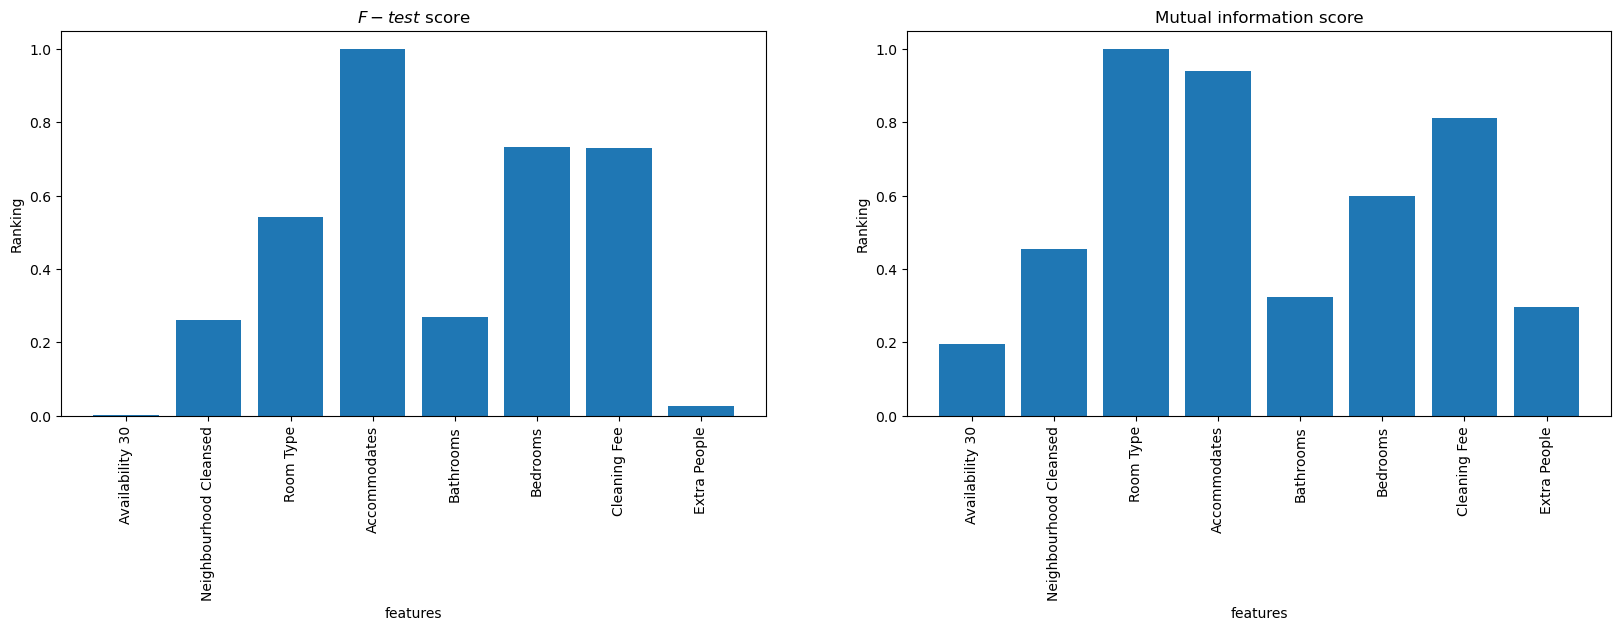

In [212]:
from sklearn.feature_selection import f_regression, mutual_info_regression
#do calculations 

#feature_names = X_train.columns.difference(['Availability 30','Availability 365','Review Scores Rating','Property Type','Bed Type','Cancellation Policy','Minimum Nights','Maximum Nights'])
feature_names = X_train.columns[:]
f_test = f_regression(X_train, y_train)[0]
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

#do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation=90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-test$ score')


plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation=90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Viendo la primera ejecución de la cual pongo imagen, no se parecen demasiado F-test y mutual info, veo que si hago corte por ejemplo en 0.2 del ranking de mutual info y eliminaria los Availability 30, Review Scores, Property type, bed type cancellation policy y maximum nights, pero no elimino nada aún porque quiero ver el resultado de los Wrappers

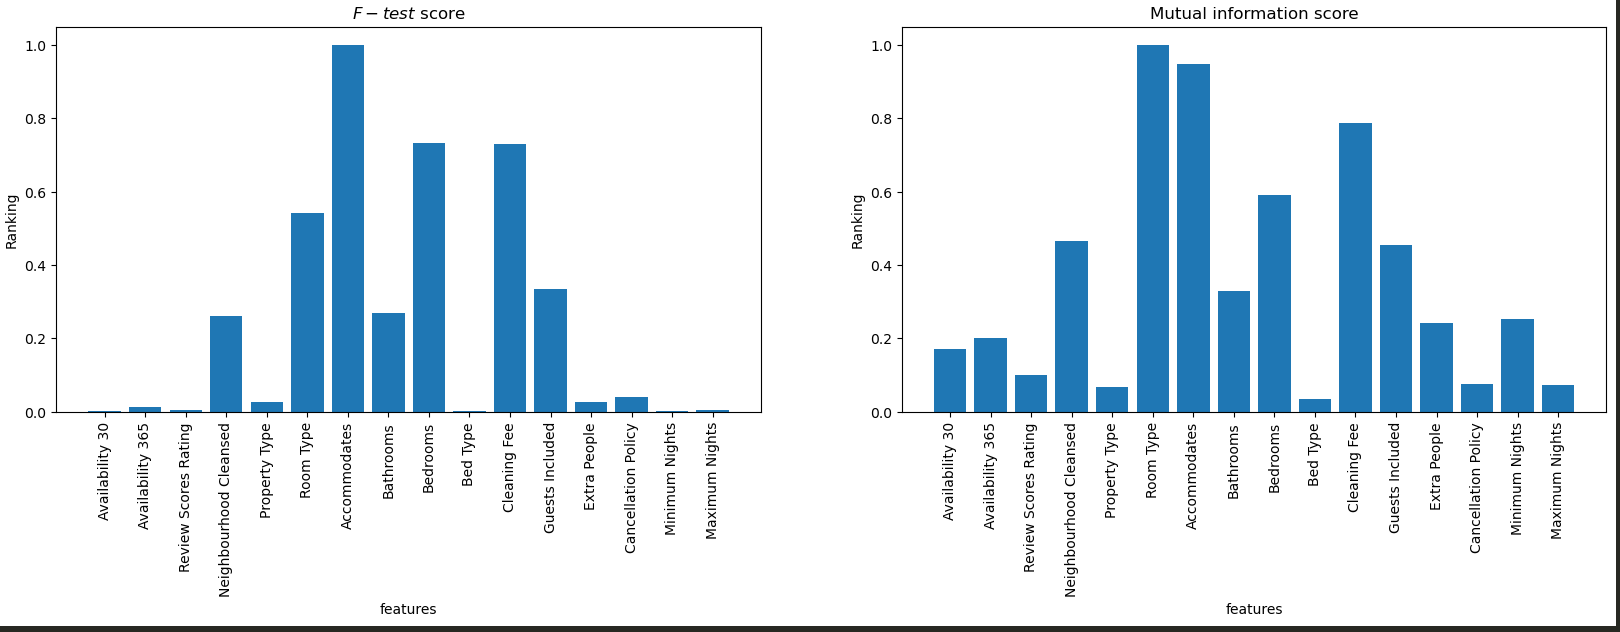

## Regresión Polinómica. Cross Validation y Evaluación

In [213]:
#Primero buscamos el degree óptimo con gridsearchCV que nos dice que el mejor es el 2

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Supongamos que X_train_scaled es tu conjunto de características escaladas
# y y_train es tu variable objetivo escalada

# Define el modelo de regresión polinómica como un pipeline
poly_reg = make_pipeline(PolynomialFeatures(), LinearRegression())

# Define los grados que deseas probar en GridSearchCV, en las pruebas lo hice con más y salió como óptimo el 2, pongo menos por si hay que reejecutar q no tarde tanto
degrees = [1, 2, 3]

# Parámetros que GridSearchCV probará
param_grid = {'polynomialfeatures__degree': degrees}

# Instancia de GridSearchCV
grid_search = GridSearchCV(poly_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Ajusta GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Mejor grado encontrado
best_degree = grid_search.best_params_['polynomialfeatures__degree']
print(f'Mejor grado encontrado: {best_degree}')



Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=3; total time=   0.0s
[CV] END .......................polynomialfeature

## Aplicamos la Regresion con el mejor grado calculado para train y test

MSE con el mejor modelo (grado 2): 1121.4451739712958
MSE con el mejor modelo (grado 2): 1242.8713015650435
RMSE con el mejor modelo (grado 2): 33.48798551676848
RMSE con el mejor modelo (grado 2): 35.25437989193745


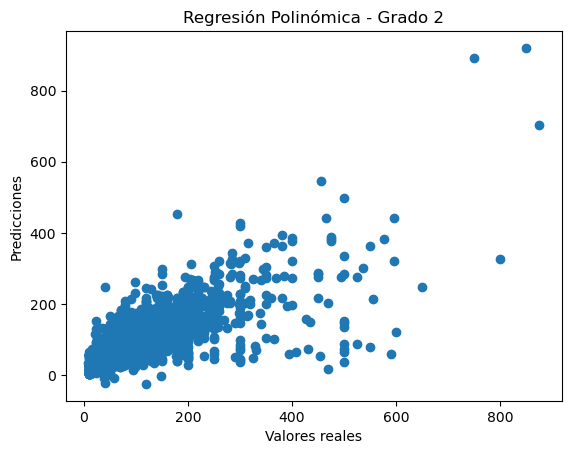

In [214]:


from sklearn.metrics import mean_squared_error

# Crea un nuevo modelo de regresión polinómica con el mejor grado encontrado
poly = PolynomialFeatures(degree=best_degree)

# Entrena el modelo con los datos de entrenamiento
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly =poly.fit_transform(X_test_scaled)
model = LinearRegression()

model.fit(X_train_poly, y_train)

# Predicción con el mejor modelo
y_hat_best = model.predict(X_train_poly)
y_hat_test = model.predict(X_test_poly)

# Calcula el MSE con el mejor modelo
mse_train = mean_squared_error(y_train, y_hat_best)
mse_test = mean_squared_error(y_test, y_hat_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Imprime el MSE
print(f'MSE con el mejor modelo (grado {best_degree}): {mse_train}')
print(f'MSE con el mejor modelo (grado {best_degree}): {mse_test}')
print(f'RMSE con el mejor modelo (grado {best_degree}): {rmse_train}')
print(f'RMSE con el mejor modelo (grado {best_degree}): {rmse_test}')

# Plotea los resultados si lo deseas
plt.scatter(y_train, y_hat_best)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title(f'Regresión Polinómica - Grado {best_degree}')
plt.show()

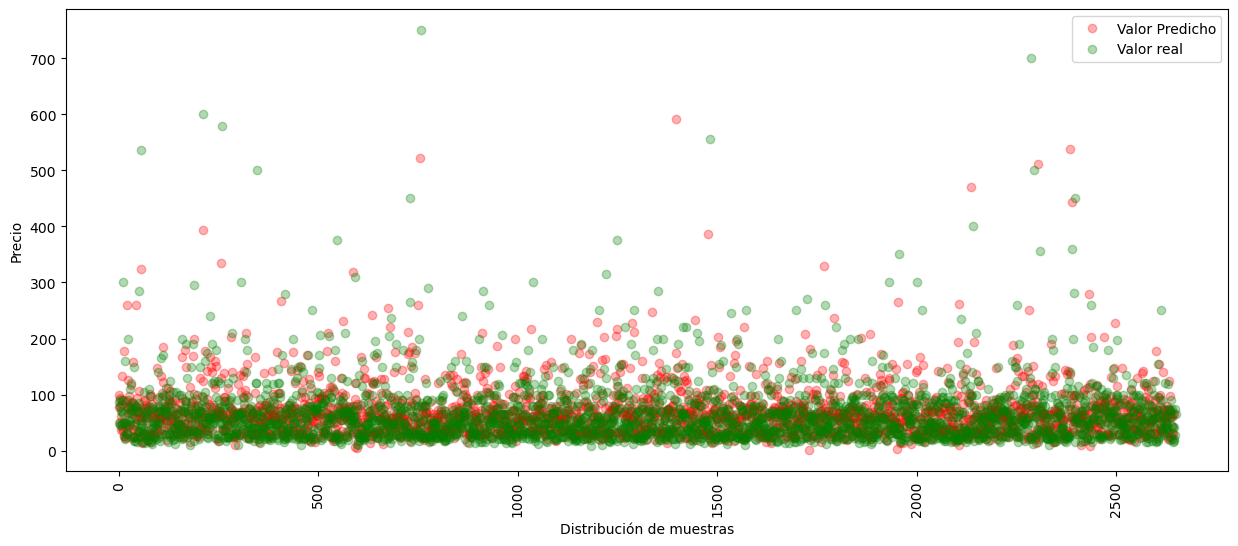

In [215]:
#Graficamos los valores reales y los predichos
plt.figure(figsize = (15, 6))
plt.plot(y_hat_test, alpha=0.3,marker='o',linestyle="none", markersize=6,color='red',label='Valor Predicho')
plt.plot(y_test, alpha=0.3,marker='o',linestyle="none", markersize=6,color='green',label='Valor real')
plt.xticks(rotation = 90)
plt.ylabel("Precio")
plt.xlabel("Distribución de muestras")
plt.legend()
plt.show()

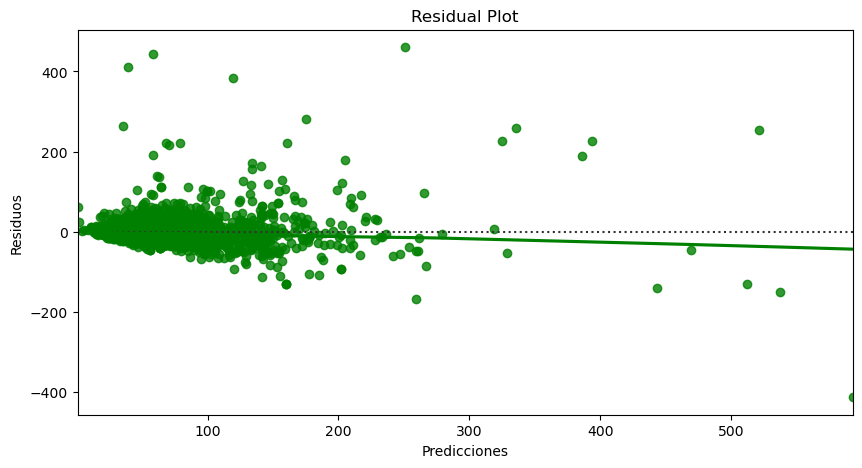

In [216]:
#Graficamos los residuos
import seaborn as sns

# Calcula los residuos
residuals = y_test - y_hat_test

# Crea un gráfico de dispersión de residuos
plt.figure(figsize=(10, 5))
sns.residplot(x=y_hat_test, y=residuals, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

Según este gráfico vemos una tendencia algo curva en los residuos  deberían estar concentrados cerca del 0 pero vemos que hay bastantes residuos cerca de 100 y -100 y para valores de más de 200 tenemos pocas muestras.

## Ridge regression. Cross Validation y Evaluación

Mejores parámetros: {'alpha': 10.0}


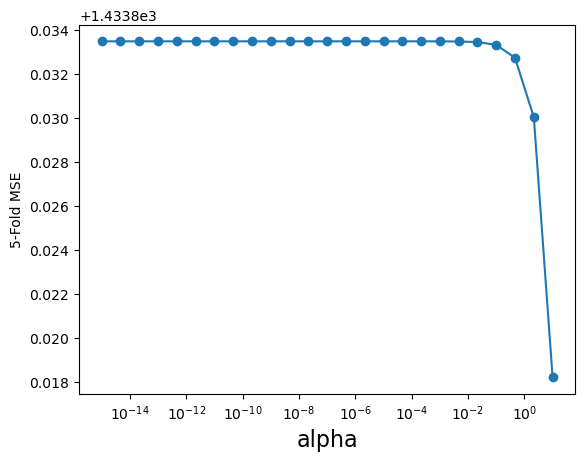

In [217]:
#con GridsearchCV buscamos el valor optimo de alpha
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


alpha_vector = np.logspace(-15, 1, 25)


param_grid = {'alpha': alpha_vector}

# Instancia de GridSearchCV con Ridge como estimador
grid = GridSearchCV(Ridge(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=10)

# Ajusta GridSearchCV con tus datos de entrenamiento
grid.fit(X_train, y_train)

# Imprime información sobre el mejor parámetro y otros resultados
print("Mejores parámetros: {}".format(grid.best_params_))

# Grafica los resultados
scores = -1 * np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector, scores, '-o')
plt.xlabel('alpha', fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [218]:
from sklearn.linear_model import Ridge

# Obtén el mejor valor de alpha
alpha_optimo = grid.best_params_['alpha']
#alpha_optimo = 1e-2



# Crea y ajusta el modelo de regresión Ridge con el mejor alpha
ridge_model = Ridge(alpha=alpha_optimo)
ridge_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_ridge_train = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evalúa el rendimiento del modelo en el conjunto de prueba, por ejemplo, calcula el MSE
mse_train = mean_squared_error(y_train, y_pred_ridge_train)
mse_test = mean_squared_error(y_test, y_pred_ridge)
#print("MSE en el conjunto de prueba:", mse_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Imprimir los resultados
print('RMSE Modelo Ridge (train): {:.3f}'.format(mse_train))
print('RMSE Modelo Ridge (test) : {:.3f}'.format(mse_test))
print('RMSE Modelo Ridge (train): {:.3f}'.format(rmse_train))
print('RMSE Modelo Ridge (test) : {:.3f}'.format(rmse_test))


# Muestra los coeficientes en el conjunto de entrenamiento
coef_names = [f'{X_train.columns[i]}: ' for i in range(len(X_train.columns))]
for f, wi in zip(coef_names, ridge_model.coef_):
    print(f, wi)


RMSE Modelo Ridge (train): 1422.291
RMSE Modelo Ridge (test) : 1484.581
RMSE Modelo Ridge (train): 37.713
RMSE Modelo Ridge (test) : 38.530
Availability 30:  0.8239209905405482
Neighbourhood Cleansed:  0.5285463113531528
Room Type:  0.4738607922482861
Accommodates:  5.098216644693113
Bathrooms:  12.765651130088662
Bedrooms:  14.301090206921643
Cleaning Fee:  0.5257182984402462
Extra People:  -0.3307375235269834


El MSE es incluso más alto que el de la regresión, así como el error y no deja a 0 ninguna de las variables aunque tenemos algunas mas cercanas a 0 o incluso con valores negativos. Una posible solución podría ser aumentar alpha pero penalizaríamos el error obtenido, he hecho alguna prueba y no llega a eliminar variables ni siquiera antes de eliminarlas tras revisar los Wrapper

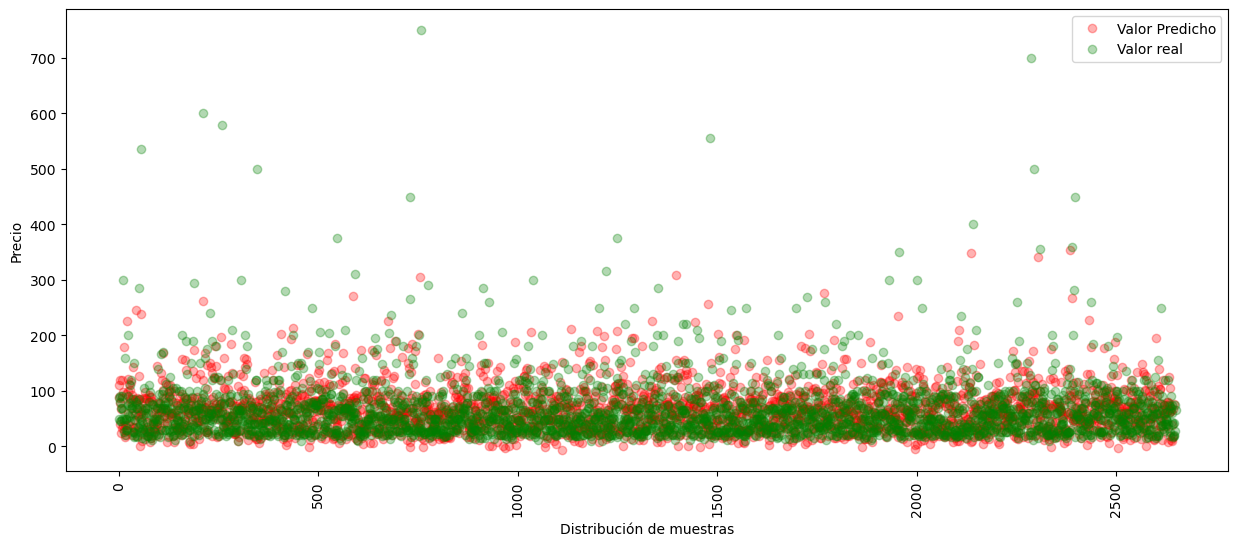

In [219]:
#Graficamos los valores reales y los predichos
plt.figure(figsize = (15, 6))
plt.plot(y_pred_ridge, alpha=0.3,marker='o',linestyle="none", markersize=6,color='red',label='Valor Predicho')
plt.plot(y_test, alpha=0.3,marker='o',linestyle="none", markersize=6,color='green',label='Valor real')
plt.xticks(rotation = 90)
plt.ylabel("Precio")
plt.xlabel("Distribución de muestras")
plt.legend()
plt.show()

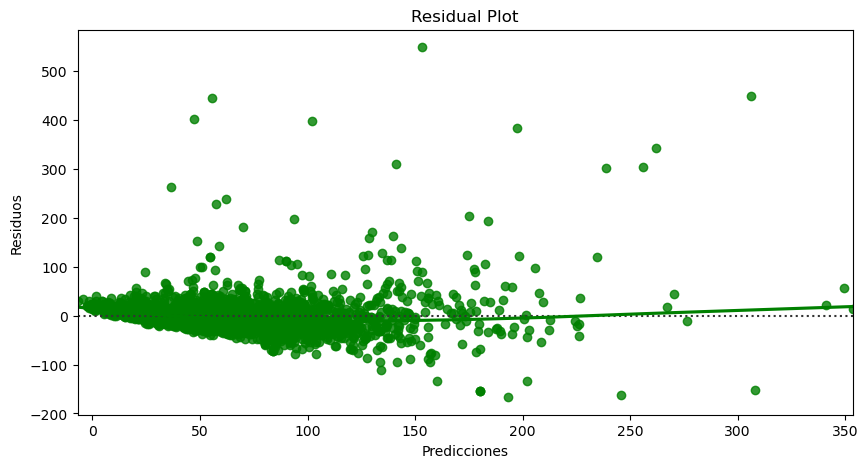

In [220]:
#Graficamos los residuos
import seaborn as sns

# Calcula los residuos
residuals = y_test - y_pred_ridge

# Crea un gráfico de dispersión de residuos
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred_ridge, y=residuals, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

Según este gráfico vemos que sigue la tendencia un poco curva que ya se veía en la regresión, sobretodo para los valores hasta 150, no se ve una gran mejora respecto al anterior modelo

## Lasso regression. Cross Validation y Evaluación

Mejores parámetros: {'alpha': 0.1}


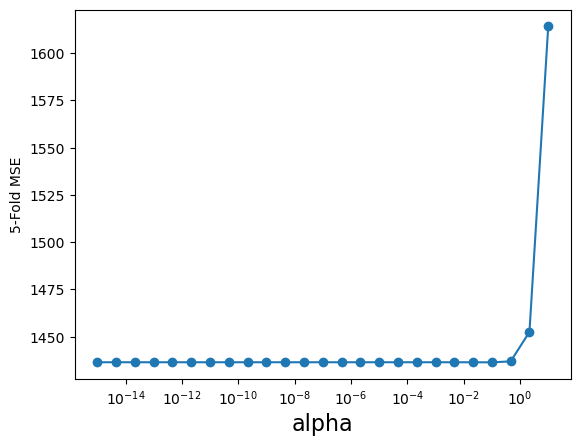

In [221]:
#con GridsearchCV buscamos el valor optimo de alpha
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso


alpha_vector = np.logspace(-15, 1, 25)


param_grid = {'alpha': alpha_vector}

# Instancia de GridSearchCV con Ridge como estimador
grid = GridSearchCV(Lasso(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=5)

# Ajusta GridSearchCV con tus datos de entrenamiento
grid.fit(X_train, y_train)

# Imprime información sobre el mejor parámetro y otros resultados
print("Mejores parámetros: {}".format(grid.best_params_))

# Grafica los resultados
scores = -1 * np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector, scores, '-o')
plt.xlabel('alpha', fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [222]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train_scaled,y_train)

ytrainLasso = lasso.predict(X_train_scaled)
ytestLasso  = lasso.predict(X_test_scaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi) 


MSE Modelo Lasso (train): 1.42e+03
MSE Modelo Lasso (test) : 1.48e+03
RMSE Modelo Lasso (train): 37.7
RMSE Modelo Lasso (test) : 38.5
Availability 30 7.306723145294136
Neighbourhood Cleansed 10.13577289257749
Room Type 12.297974412737423
Accommodates 10.175433936742305
Bathrooms 7.555342852716053
Bedrooms 11.751951235321929
Cleaning Fee 12.726703892225725
Extra People -3.3676927943873856


El MSE es alto ye l error igual que el Ridge, de la misma manera Extra people por ejemplo sale negativo sin embargo aumentando el parametro de regularización deja de salir negativo pero penaliza el error y he realizado pruebas eliminando extra people pero empeoran los modelos en general

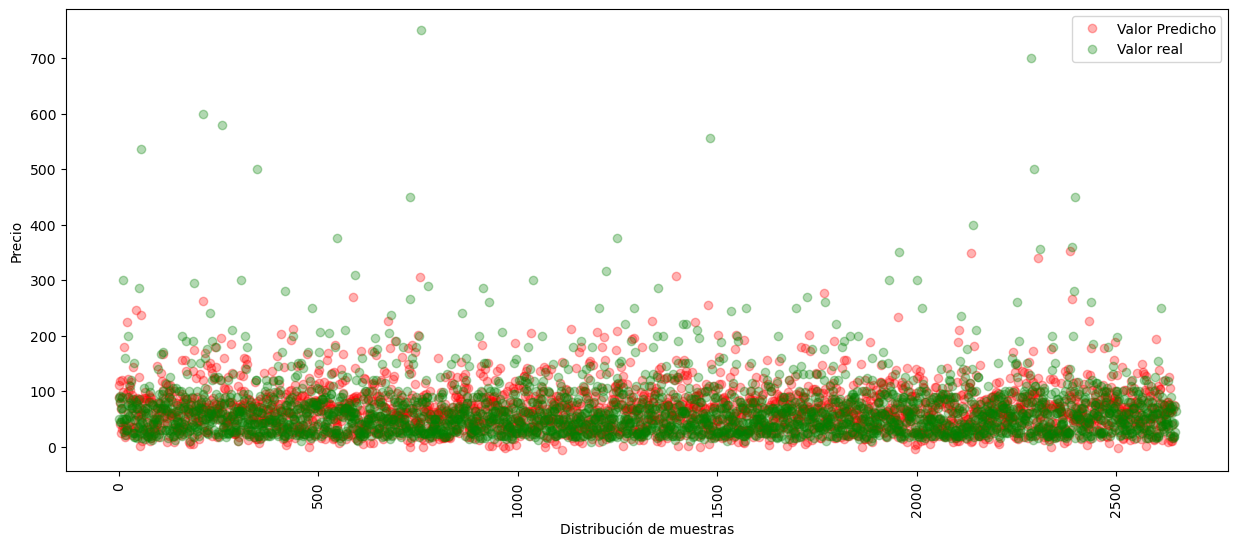

In [223]:
#Graficamos los valores reales y los predichos
plt.figure(figsize = (15, 6))
plt.plot(ytestLasso, alpha=0.3,marker='o',linestyle="none", markersize=6,color='red',label='Valor Predicho')
plt.plot(y_test, alpha=0.3,marker='o',linestyle="none", markersize=6,color='green',label='Valor real')
plt.xticks(rotation = 90)
plt.ylabel("Precio")
plt.xlabel("Distribución de muestras")
plt.legend()
plt.show()

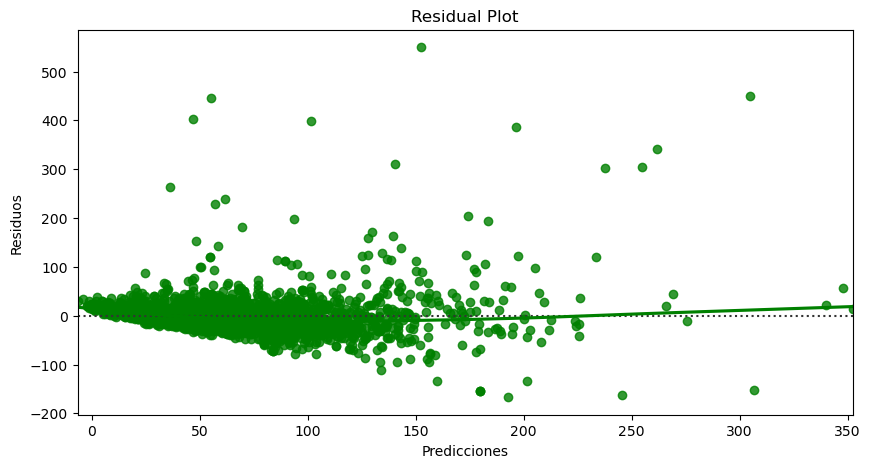

In [224]:
#Graficamos los residuos
import seaborn as sns

# Calcula los residuos
residuals = y_test - ytestLasso

# Crea un gráfico de dispersión de residuos
plt.figure(figsize=(10, 5))
sns.residplot(x=ytestLasso, y=residuals, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

El gráfico sigue siendo muy parecido a los modelos anteriores y el MSE es el más alto de los 3

## Arbol de decisión. Cross Validation y Evaluación

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END .......................................

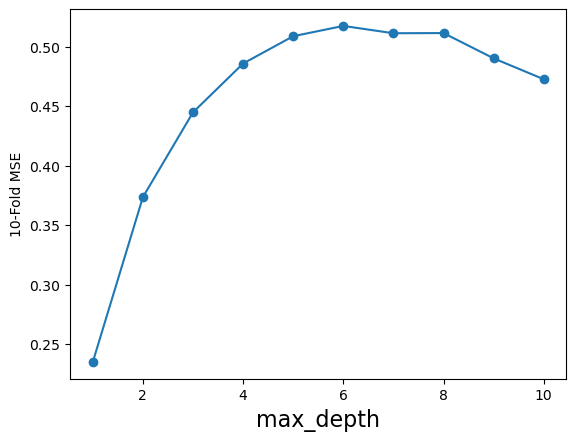

In [225]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

maxDepth = range(1,11)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [226]:
# Crea y ajusta el modelo de regresión de árbol de decisión
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train, y_train)

ytrainRF = treeModel.predict(X_train)
ytestRF= treeModel.predict(X_test)

mse_train = mean_squared_error(y_train,ytrainRF )
mse_test = mean_squared_error(y_test,ytestRF )


print("MSE Treemodel train: %0.3g" % mse_train)
print("MSE Treemodel test: %0.3g" % mse_test)
print("RMSE Treemodel train: %0.3g" % np.sqrt(mse_train))
print("RMSE Treemodel test: %0.3g" % np.sqrt(mse_test))
print("Train: ", treeModel.score(X_train, y_train))
print("Test: ", treeModel.score(X_test, y_test))


MSE Treemodel train: 1.09e+03
MSE Treemodel test: 1.28e+03
RMSE Treemodel train: 33
RMSE Treemodel test: 35.8
Train:  0.6519164827733721
Test:  0.5909867880262376


En este caso estima que max_depth es 6, me parece correcto usar ese viendo el gráfico ya que no es un modelo muy complejo pero vemos que la prestación no es muy buena, no era mejor antes de eliminar las variables tras la selección de características

# Importancia de las variables para el arbol de decision

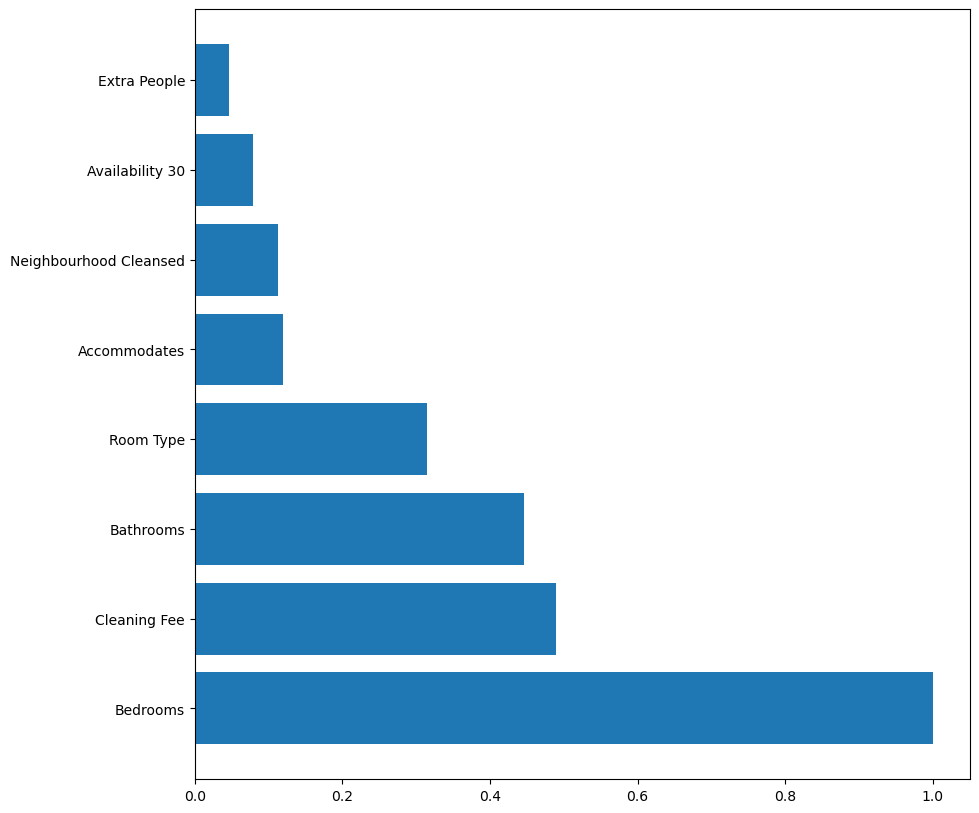

In [227]:

importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

## Randomforest. Cross Validation y Evaluación

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.3s
[CV] END .......................................

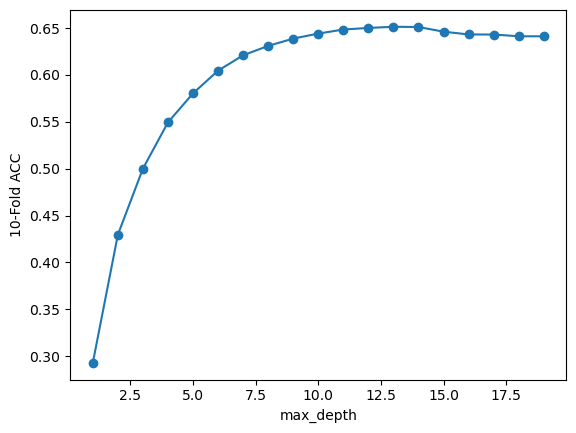

In [229]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-Fold ACC')

plt.show()

Indica que le valor óptimo de max_depth es 13, por la diferencia podríamos coger entre un 8 o un 10 para hacer el modelo menos complejo, pero me parece bien dejar el valor que da gridsearchCV
vemos que las prestaciones mejoran respecto al arbol de decisión pero hay bastante diferencia entre train y test cosa que puede indicar overfitting

In [230]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

ytrainRF = randomForest.predict(X_train)
ytestRF= randomForest.predict(X_test)

mse_train = mean_squared_error(y_train,ytrainRF )
mse_test = mean_squared_error(y_test,ytestRF )


print("MSE randomForest train: %0.3g" % mse_train)
print("MSE randomForest test: %0.3g" % mse_test)
print("RMSE TreerandomForestmodel train: %0.3g" % np.sqrt(mse_train))
print("RMSE randomForest test: %0.3g" % np.sqrt(mse_test))

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

MSE randomForest train: 461
MSE randomForest test: 1.05e+03
RMSE TreerandomForestmodel train: 21.5
RMSE randomForest test: 32.3
Train:  0.8527910404009537
Test:  0.6665965267406719


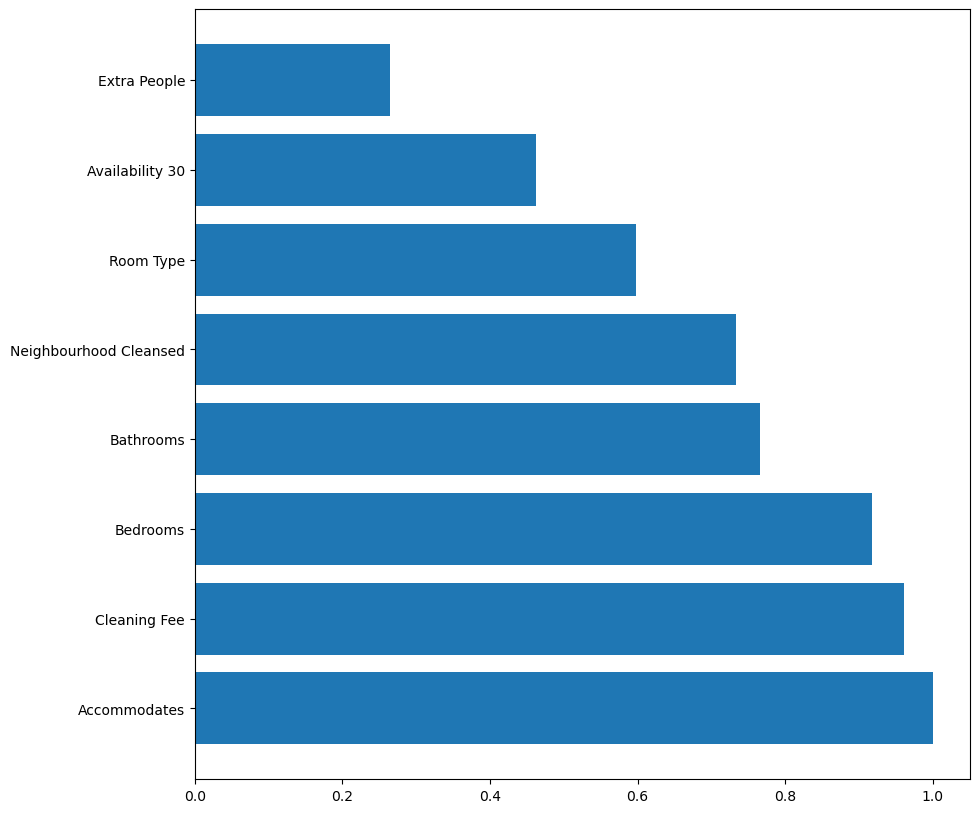

In [231]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

## Bagging regressor. Cross Validation y Evaluación

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ........................base_estimator__max_depth=1; total time=   0.3s
[CV] END ........................base_estimator__max_depth=1; total time=   0.3s
[CV] END ........................base_estimator__max_depth=1; total time=   0.3s
[CV] END ........................base_estimator__max_depth=1; total time=   0.3s
[CV] END ........................base_estimator__max_depth=1; total time=   0.3s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=3; total time=   0.5s
[CV] END ........................base_estimator_

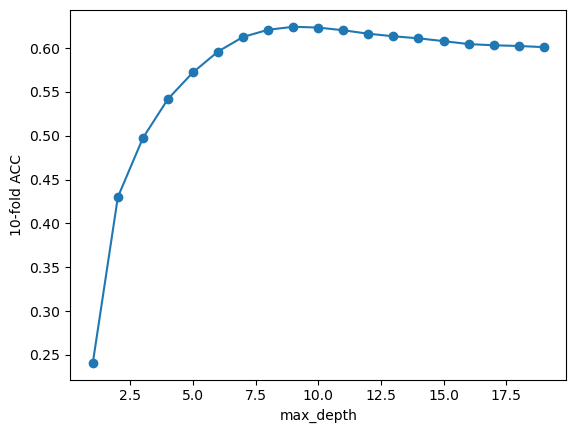

In [232]:
from sklearn.ensemble import BaggingRegressor

maxDepth = range(1,20)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

En este caso como en randomforest nos indica que masx_depth es 9 y también lo vamos a dejar así

In [233]:
maxDepthOptimo = grid.best_params_['base_estimator__max_depth']
baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train,y_train)

ytrainRF = baggingModel.predict(X_train)
ytestRF= baggingModel.predict(X_test)

mse_train = mean_squared_error(y_train,ytrainRF )
mse_test = mean_squared_error(y_test,ytestRF )


print("MSE baggingModel train: %0.3g" % mse_train)
print("MSE baggingModel test: %0.3g" % mse_test)
print("RMSE baggingModel train: %0.3g" % np.sqrt(mse_train))
print("RMSE baggingModel test: %0.3g" % np.sqrt(mse_test))

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

MSE baggingModel train: 674
MSE baggingModel test: 1.11e+03
RMSE baggingModel train: 26
RMSE baggingModel test: 33.3
Train:  0.7846867739050559
Test:  0.6465086248452324


La precisión nos ha bajado en los 2 casos pero también ha bajado algo la diferencia entre train y test

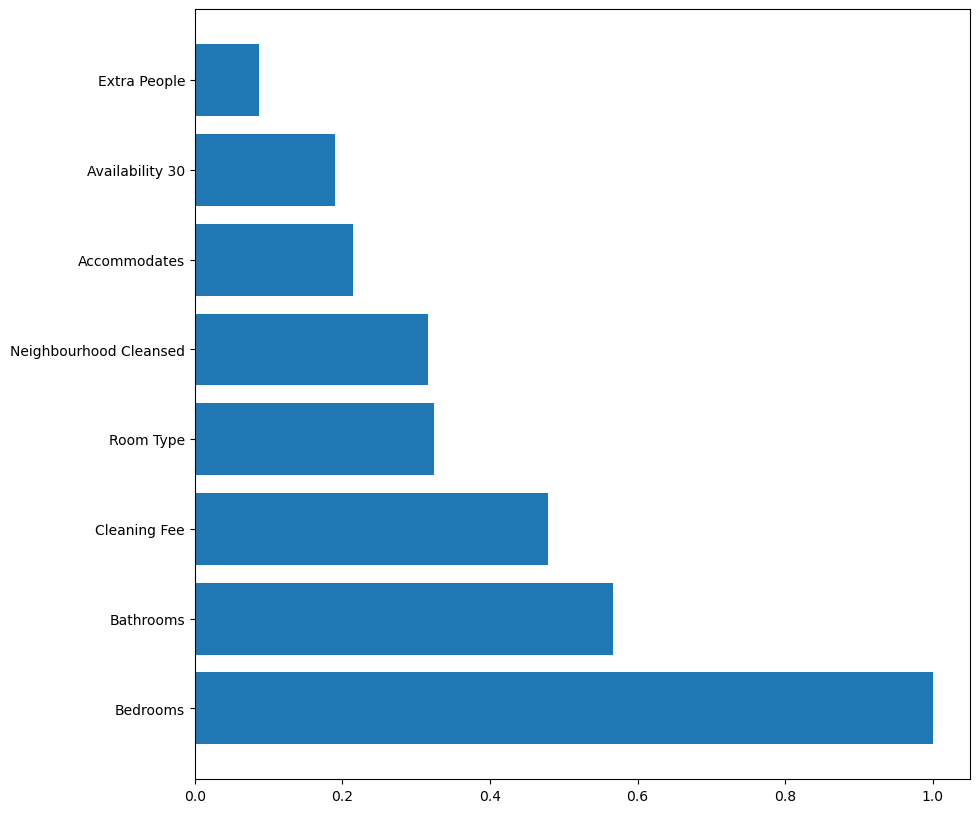

In [234]:
importances = np.mean([tree.feature_importances_ for tree in baggingModel.estimators_], axis=0)
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

# GradientBoostingRegressor. Cross Validation y Evaluación

In [235]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [1000,1500,2000,5000]
learningRate = [0.1,0.05,0.001]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   2.7s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   2.8s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   2.8s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   4.1s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   4.1s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   4.1s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=   5.5s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=   5.5s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=   5.5s
[CV] END ...............learning_rate=0.1, n_estimators=5000; total time=  13.9s
[CV] END ...............learning_rate=0.1, n_estimators=5000; total time=  13.9s
[CV] END ...............learning_rate=0.1, n_est

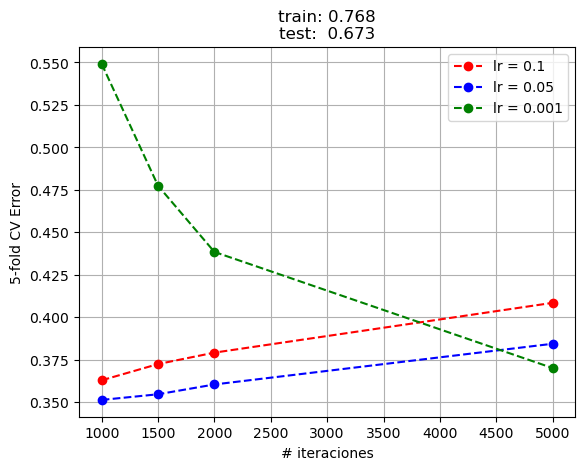

In [236]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [237]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
gradientboosting = GradientBoostingRegressor(max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo).fit(X_train,y_train)

ytrainRF = gradientboosting.predict(X_train)
ytestRF= gradientboosting.predict(X_test)

mse_train = mean_squared_error(y_train,ytrainRF )
mse_test = mean_squared_error(y_test,ytestRF )


print("MSE gradientboosting train: %0.3g" % mse_train)
print("MSE gradientboosting test: %0.3g" % mse_test)
print("RMSE gradientboosting train: %0.3g" % np.sqrt(mse_train))
print("RMSE gradientboosting test: %0.3g" % np.sqrt(mse_test))

print("Train: ",gradientboosting.score(X_train,y_train))
print("Test: ",gradientboosting.score(X_test,y_test))

MSE gradientboosting train: 728
MSE gradientboosting test: 1.03e+03
RMSE gradientboosting train: 27
RMSE gradientboosting test: 32
Train:  0.7676215911063787
Test:  0.6727943383697983


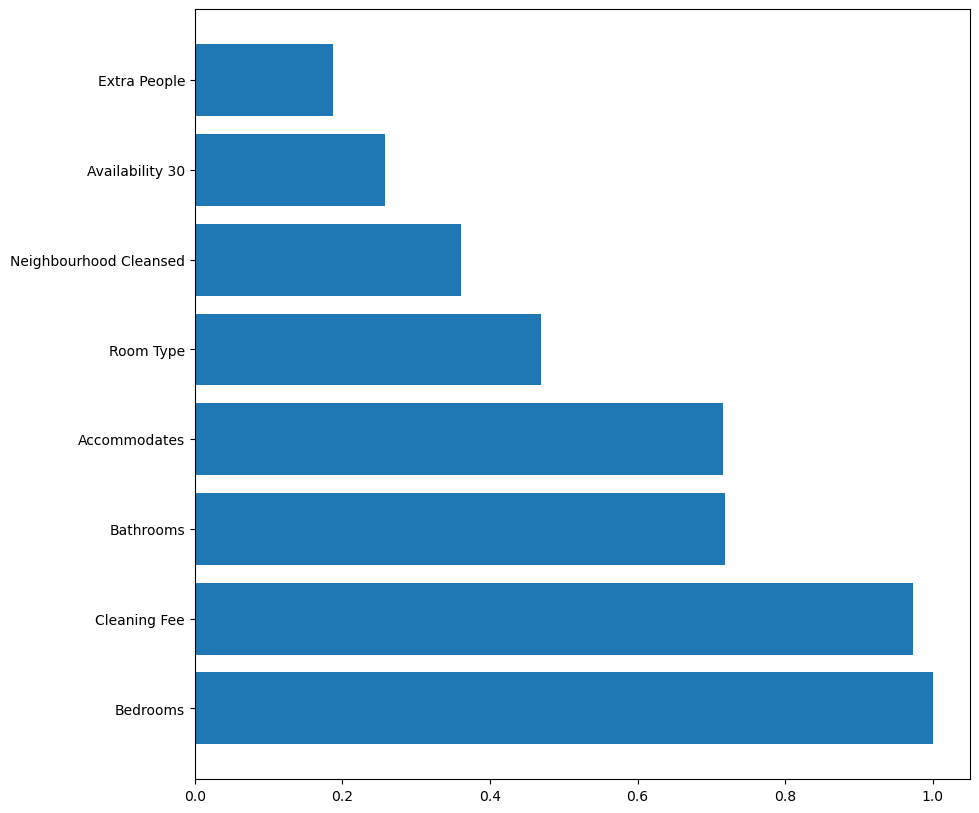

In [238]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

## CONCLUSIÓN

Me he decantado por el GadrientBoosting:

Durante la práctica he realizado varias pruebas ejecutando todo el pipeline con todos los modelos, eliminando variables y también sin eliminar, pero las prestaciones no han cambiado mucho, en boosting probé con vectores más grandes para ver si mejoraban los resultados, pero tardaba mucho y al final no mejoraba el modelo así que lo dejé como está para evitar tiempos de ejecución tan largos.

Boosting no es que tenga muy buenas prestaciones Train:  0.7676 Test:  0.67242 y es verdad que aumenta el error en test respecto a train, pero los errores son más bajos que en, por ejemplo,  regresion, ridge o lasso donde, al igual que en el resto de modelos, también es algo mayor el error de test que el de train. Podría haber elegido la regresión logística porque el error es algo mayor también en test que en train, esto nos estaría indicando algo de overfitting, pero en este modelo hay menos diferencia entre las prestaciones de train y test, aunque habría que realizar mejoras en el modelo.

 Si lo comparo con el arbol individual, con randomforest o con bagging la diferencia entre las prestaciones de train y test es la más baja, y es verdad que el arbol individual no tiene tanta diferencia entre el error de train y test, pero puede deberse a que el algoritmo sólo usa la característica que considera mejor en cada iteración por lo que también es el modelo que tiene las prestaciones más bajas. Con bagging no hay mucha diferencia pero el error de bagging en train es menor que el de boosting pero en cambio el de test es algo más alto lo que me puede indicar más overfitting en bagging que en boosting.

Creo que viendo los resultados sería intereseante ver como se comporta si quitamos los registros con precios más altos ya que es son pocas muestras y no podemos entrenar bien el modelo para valores altos, eso nos puede estar penalizando.
Otra opción podría ser aumentar los parámetros de regularización, o ver si podemos definir nuevas variables en el modelo que nos puedan ayudar a mejorar el MSE, por ejemplo, añadir alguna variable que recoja características del apartamento, por ejemplo que tenga wifi, aire acondicionado,etc. 

